In [134]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [135]:
%store -r model_dt
%store -r data

In [136]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [137]:
data_bg = data.copy()
data_bg.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_bg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [138]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

X = data_bg.drop(['state'],axis=1)
y = data_bg['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [139]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


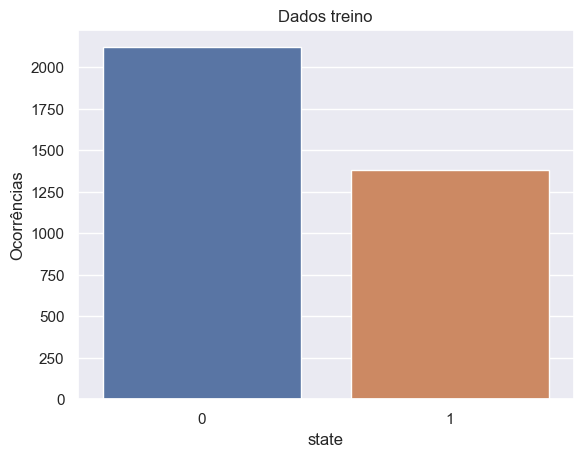

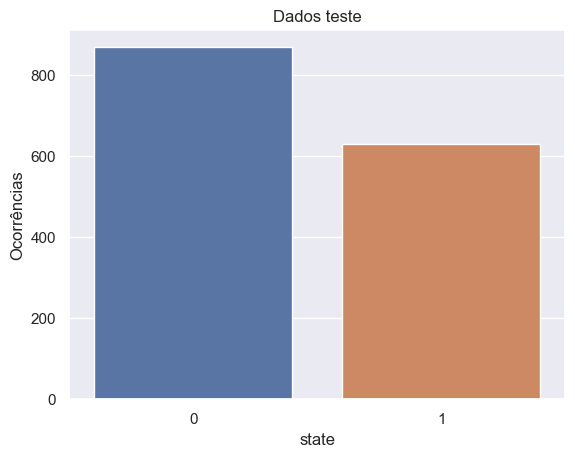

In [140]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [141]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

sss = StratifiedShuffleSplit(n_splits=10, test_size=20, random_state=2022)

In [142]:
bg_model = BaggingClassifier(estimator=dt_model, bootstrap=True)

In [143]:
n_estimators = [10, 40, 60, 80, 100, 160]

In [144]:
parameters = {'n_estimators': n_estimators}

In [145]:
grid_bg = GridSearchCV(estimator = bg_model, param_grid = parameters, cv = sss)

In [146]:
grid_bg.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=2022, test_size=20,
            train_size=None),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=2022)),
             param_grid={'n_estimators': [10, 40, 60, 80, 100, 160]})

In [147]:
bst_bg_model = grid_bg.best_estimator_

In [148]:
print(bst_bg_model)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022),
                  n_estimators=40)


In [149]:
bst_bg_model.fit(X_train, y_train.values.ravel())

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022),
                  n_estimators=40)

In [150]:
bst_bg_score = bst_bg_model.score(X_test, y_test)

In [151]:
print("Accuracy: %.2f%%" % (bst_bg_score *100))

Accuracy: 83.27%


In [152]:
bg_predictions = bst_bg_model.predict(X_test)

In [153]:
print(classification_report(y_test, bg_predictions))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       869
           1       0.75      0.90      0.82       631

    accuracy                           0.83      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.85      0.83      0.83      1500

